In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image

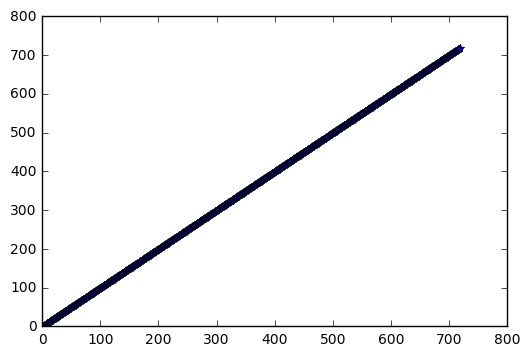

In [5]:

plt.plot(ploty,'*')

In [6]:
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient

In [7]:
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

In [8]:
leftx

array([ 232.    ,  181.0003,  177.0012,  169.0027,  236.0048,  201.0075,
        249.0108,  167.0147,  171.0192,  192.0243,  203.03  ,  244.0363,
        193.0432,  200.0507,  207.0588,  202.0675,  167.0768,  197.0867,
        212.0972,  220.1083,  199.12  ,  221.1323,  194.1452,  241.1587,
        242.1728,  210.1875,  169.2028,  211.2187,  195.2352,  164.2523,
        199.27  ,  215.2883,  210.3072,  185.3267,  150.3468,  172.3675,
        198.3888,  240.4107,  176.4332,  191.4563,  201.48  ,  239.5043,
        232.5292,  160.5547,  152.5808,  178.6075,  239.6348,  224.6627,
        234.6912,  250.7203,  242.75  ,  220.7803,  159.8112,  175.8427,
        170.8748,  192.9075,  215.9408,  206.9747,  209.0092,  233.0443,
        179.08  ,  221.1163,  187.1532,  214.1907,  215.2288,  158.2675,
        170.3068,  240.3467,  227.3872,  246.4283,  225.47  ,  164.5123,
        186.5552,  184.5987,  158.6428,  216.6875,  213.7328,  154.7787,
        242.8252,  178.8723,  210.92  ,  215.9683, 

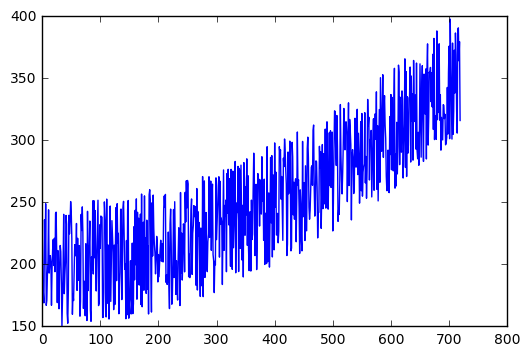

In [9]:
plt.plot(leftx,'-')

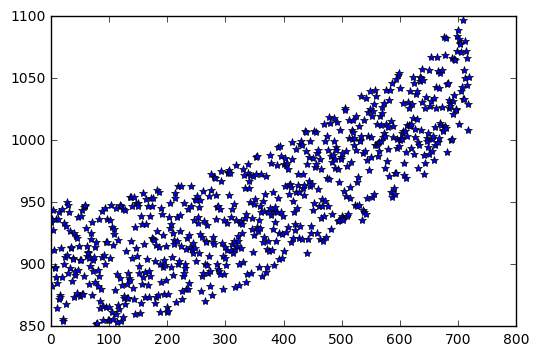

In [10]:
plt.plot(rightx,'*')

In [11]:
leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


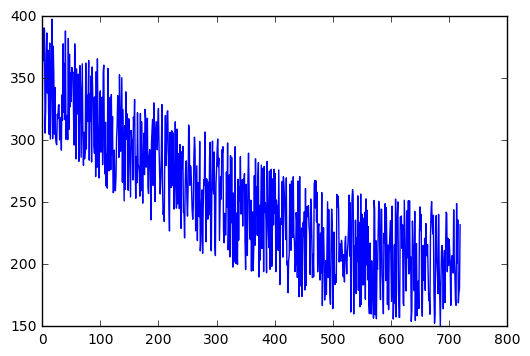

In [13]:
plt.plot(leftx,'-')

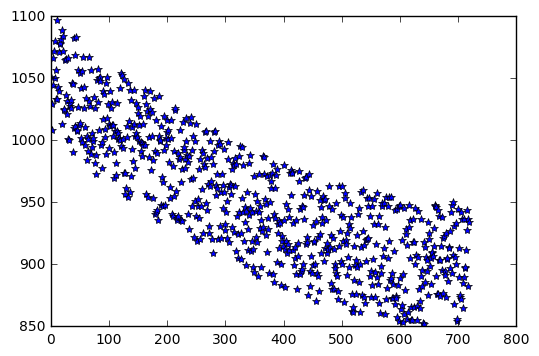

In [15]:
plt.plot(rightx,'*')

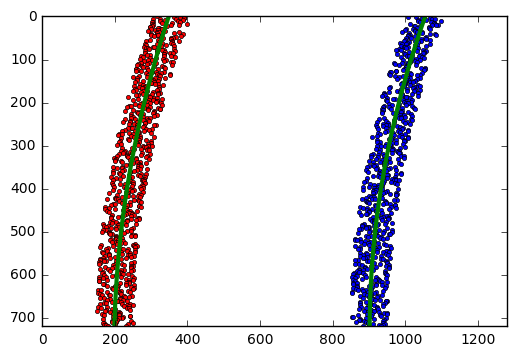

In [16]:
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [17]:
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

2015.88494406 1742.31425565


In [18]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')

661.280311862 m 572.235305453 m
